<a href="https://colab.research.google.com/github/YogeshParihar1311/Deep_Learning/blob/main/DL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [12]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [20]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [21]:
import matplotlib.pyplot as plt

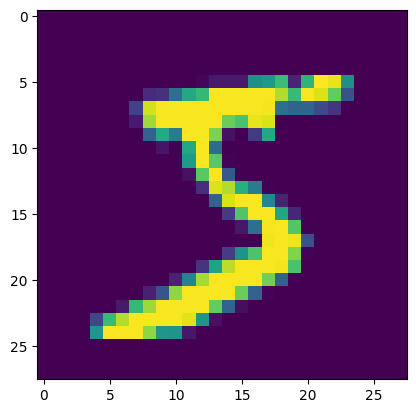

In [22]:
plt.imshow(X_train[0])

In [36]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics="accuracy")

In [52]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0551 - accuracy: 0.9867 - val_loss: 0.2439 - val_accuracy: 0.9562
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9856 - val_loss: 0.2207 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0543 - accuracy: 0.9877 - val_loss: 0.2014 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9872 - val_loss: 0.2205 - val_accuracy: 0.9686
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9872 - val_loss: 0.2021 - val_accuracy: 0.9694
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0501 - accuracy: 0.9888 - val_loss: 0.2122 - val_accuracy: 0.9662
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9892 - val_loss: 0.2519 - val_accuracy:

In [53]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[5.93624047e-19, 1.06612963e-19, 1.25354068e-20, ...,
        9.99999642e-01, 8.51607477e-31, 2.98369486e-07],
       [2.97558728e-10, 4.64002539e-18, 1.00000000e+00, ...,
        2.52953242e-10, 4.52399688e-22, 3.00589326e-22],
       [8.90755309e-33, 1.00000000e+00, 2.33974576e-19, ...,
        1.29884752e-17, 1.47415806e-25, 8.99646026e-14],
       ...,
       [6.11648725e-14, 7.95046197e-20, 4.33981136e-18, ...,
        3.49709457e-29, 2.84856831e-36, 2.00149816e-06],
       [8.24991456e-15, 4.05782249e-22, 3.39171553e-16, ...,
        8.55056034e-21, 1.04377151e-12, 1.75476106e-14],
       [1.74222014e-23, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.50735296e-30, 0.00000000e+00]], dtype=float32)

In [54]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred)

0.9701

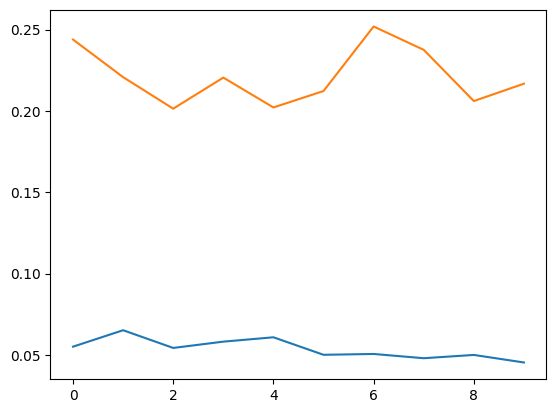

In [57]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


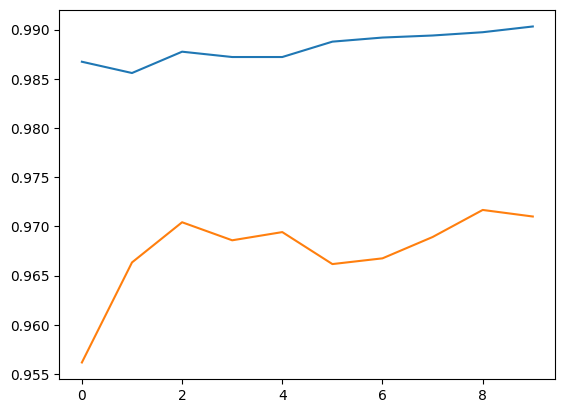

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])